 
 <h1><center>Facebook Analytics -- Taylor Swift Post</center></h1>

![facebookanalytics](https://user-images.githubusercontent.com/31974451/36244429-0169d16a-11db-11e8-9edf-abbf53ffe269.png)


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fetching-data---Calling-Facebook-API" data-toc-modified-id="Fetching-data---Calling-Facebook-API-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fetching data - Calling Facebook API</a></span><ul class="toc-item"><li><span><a href="#set-up-token" data-toc-modified-id="set-up-token-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>set up token</a></span></li><li><span><a href="#store-the-data-in-JASON" data-toc-modified-id="store-the-data-in-JASON-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>store the data in JASON</a></span></li></ul></li><li><span><a href="#Data-Analysis-&amp;-EDA" data-toc-modified-id="Data-Analysis-&amp;-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Analysis &amp; EDA</a></span><ul class="toc-item"><li><span><a href="#load-the-data" data-toc-modified-id="load-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>load the data</a></span></li><li><span><a href="#check-the-website-for-the-newest-post" data-toc-modified-id="check-the-website-for-the-newest-post-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>check the website for the newest post</a></span></li><li><span><a href="#counting-top-words" data-toc-modified-id="counting-top-words-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>counting top words</a></span></li></ul></li></ul></div>

In [ ]:
#!pip install facebook-sdk

## Fetching data - Calling Facebook API

### set up token

In [3]:
token = 'EAAH00e04yJkBAJByR5n8lbLebVx7MlTdvpN1ehARHx8EtgFNElqlvoCdZCUUXHu6Jutgmm7AiTs345n07Y1rGWO7ZC38R8f8Ij59PrdOZCmyWXheRlWrMVZBLt0ScFYpnZC9mNZBME0o2Cg1i0xuab9zQZBgZCRnzJ7CGB8cLhNBaAIytvgTOUz51dvAYOMUk9CFbtSmc81HugZDZD'

In [4]:
import time
import pickle
import random
import facebook
import requests

graph = facebook.GraphAPI(access_token= token)

def some_action(post):
    """ Here you might want to do something with each post. E.g. grab the
    post's message (post['message']) or the post's picture (post['picture']).
    In this implementation we just print the post's created time.
    """
    return post


# You'll need an access token here to do anything.  You can get a temporary one
# here: https://developers.facebook.com/tools/explorer/
# Look at Taylor Swift's profile for this example by using his Facebook id.
user = 'TaylorSwift'

graph = facebook.GraphAPI(token)
profile = graph.get_object(user)
posts = graph.get_connections(profile['id'], 'posts')

data=[]
#results=requests.get(results['paging']['next']).json()

# Wrap this block in a while loop so we can keep paginating requests until
# finished.
while True:
    try:
        # Slow down the request, instead of making 20 request per seconds, 
        # you make one request and sleep for 2 or 5 seonds random number 
        time.sleep(random.randint(3,6))
        data.extend(posts['data'])
        # Perform some action on each post in the collection we receive from Facebook.
        [some_action(post=post) for post in posts['data']]
        # Attempt to make a request to the next page of data, if it exists.
        posts = requests.get(posts['paging']['next']).json()
    except KeyError:
        # When there are no more pages (['paging']['next']), break from the
        # loop and end the script.
        break


### store the data in JASON

In [5]:
# store the data
pickle.dump(data,open("ts.pkl","wb"))

## Data Analysis & EDA

### load the data

In [6]:
loaded_data= pickle.load(file=open('ts.pkl', 'rb'))
loaded_data[0]

{'created_time': '2018-02-14T18:41:00+0000',
 'id': '19614945368_10155426872430369',
 'message': 'Happy Valentine’s Day! 💕 We’re celebrating in the online store with new merch packages available now through Sunday, February 18 at 11:59p EST (while supplies last)! \n\nShop the Distressed Black Sweatshirt Package and the I Love TS Tee Package here: http://taylor.lk/merch'}

In [7]:
import pandas as pd 
import string
from operator import itemgetter

In [8]:
df2 = pd.io.json.json_normalize(data=loaded_data)

In [9]:
df2.tail()

,created_time,id,message,story
90,2017-08-23T16:48:49+0000,19614945368_10154975228245369,NaN,Taylor Swift added 3 new photos.
91,2017-08-23T14:02:05+0000,19614945368_10154974761820369,NaN,NaN
92,2017-08-22T15:04:14+0000,19614945368_10154972197810369,NaN,NaN
93,2017-08-21T15:00:45+0000,19614945368_10154969205450369,NaN,NaN
94,2011-06-29T17:10:09+0000,19614945368_10150243908530369,Taylor is nominated for six 2011 Teen Choice A...,NaN


In [10]:
df2.columns

Index(['created_time', 'id', 'message', 'story'], dtype='object')

In [11]:
df2.rename(columns = {'created_time': 'createdtime'},inplace=True)

In [12]:
df2.fillna('', inplace=True)

In [13]:
latest_news = df2.sort_values('createdtime', ascending=False)

In [15]:
latest_news_id = latest_news["id"]
#latest_news_id

### check the website for the newest post

In [18]:
for i,x in latest_news_id.iteritems():
    print('https://www.facebook.com/' + x)

https://www.facebook.com/19614945368_10155426872430369
https://www.facebook.com/19614945368_10155421490320369
https://www.facebook.com/19614945368_10155413783385369
https://www.facebook.com/19614945368_10155409247305369
https://www.facebook.com/19614945368_10155404963725369
https://www.facebook.com/19614945368_10155396692615369
https://www.facebook.com/19614945368_10155391434005369
https://www.facebook.com/19614945368_10155370347575369
https://www.facebook.com/19614945368_10155342588370369
https://www.facebook.com/19614945368_10155341356680369
https://www.facebook.com/19614945368_10155339625850369
https://www.facebook.com/19614945368_10155325682350369
https://www.facebook.com/19614945368_10155320986195369
https://www.facebook.com/19614945368_10155295699470369
https://www.facebook.com/19614945368_10155286035690369
https://www.facebook.com/19614945368_10155281200795369
https://www.facebook.com/19614945368_10155279993215369
https://www.facebook.com/19614945368_10155279164255369
https://ww

### counting top words

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def count_words(df):
    mapping = dict.fromkeys(map(ord, string.punctuation))
    stop_words=["a","about","above","after","again","against","all","am","an","and","any",
                "are","now","aren't","as","at","be","because","been","before","being","below",
                "between","both","but","by","can't","cannot","could","couldn't","did","didn't",
                "do","does","doesn't","doing","don't","down","due","during","each","few","for","from",
                "further","had","hadn't","has","hasn't","have","haven't","having","he","he'd",
                "he'll","he's","her","here","here's","hers","herself","him","himself","his","how",
                "how's","i","i'd","i'll","i'm","i've","if","in","into","is","isn't","it","it's",
                "its","itself","let's","me","more","most","mustn't","my","myself","no","nor","not",
                "of","off","on","once","only","or","other","ought","our","ours","ourselves","out",
                "over","own","same","shan't","she","she'd","she'll","she's","should","shouldn't","so",
                "some","such","than","that","that's","the","their","theirs","them","themselves","then",
                "there","there's","these","they","they'd","they'll","they're","they've","this","those",
                "through","to","too","under","until","up","very","was","wasn't","we","we'd","we'll",
                "we're","we've","were","weren't","what","what's","when","when's","where","where's",
                "which","while","who","who's","whom","why","why's","with","won't","would","wouldn't",
                "you","you'd","you'll","you're","you've","your",'guys','just','day',"yours","yourself",
                "yourselves","will","ana","isa","can","hwa","wala","msh","wla","hya","will",'enta','7aga',
                'mesh','dah','bas','elly','b2a','3ala','alf','enty','3al',]
    space = [' ']
    words = {}
    
    for m in df2['message']:
        try:
            seperated_words = m.split(' ')
        except:
            pass
        for word in seperated_words:
            word = word.strip()
            word = word.lower()
            #remove any punctuation
            word = word.translate(mapping)
            if word in stop_words:
                continue
            if word in space:
                continue
            if len(word)<3:
                continue
            if word in words:
                words[word]+=1
            else:
                words[word]=1
    print("done counting words")
    return words

In [21]:
words = count_words(df2)
# words

done counting words


In [23]:
words_df = pd.DataFrame(list(words.items()), columns=['word','count'])
words_df.sort_values('count', ascending=False, inplace=True)
words_df.head(20)

,word,count
52,reputation,28
50,taylor,22
43,get,17
9,available,15
66,music,11
69,watch,11
6,new,10
79,swift,10
27,video,10
46,tickets,9


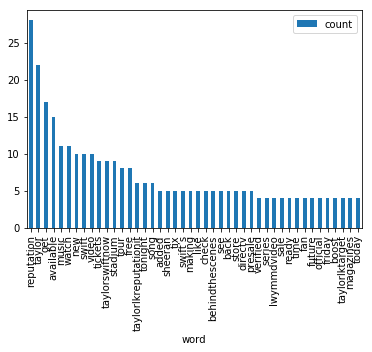

In [29]:
%matplotlib inline
words_df[words_df['count']>3].plot(x = 'word', kind = "bar")